In [41]:
# lista_05
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy as scp
import scipy.integrate as integrate
from scipy.interpolate import interp1d

### Exercicio 01



In [42]:



def phi( x, lista_X):
 p_0 = ((x-lista_X[1])*(x-lista_X[2]))/((lista_X[0]-lista_X[1])*(lista_X[0]-lista_X[2]))
 p_1 = ((x-lista_X[0])*(x-lista_X[2]))/((lista_X[1]-lista_X[0])*(lista_X[1]-lista_X[2]))
 p_2 = ((x-lista_X[0])*(x-lista_X[1]))/((lista_X[2]-lista_X[0])*(lista_X[2]-lista_X[1]))
 return p_0, p_1, p_2

def interpolacao( x,y):
 x_0= phi(x[0],x)
 x_1= phi(x[1],x)
 x_2= phi(x[2],x)

 A= np.matrix([[x_0[0],x_0[1],x_0[2]],[x_1[0],x_1[1],x_1[2]],[x_2[0],x_2[1],x_2[2]]])
 linearizada = np.linalg.solve(A,y)
 return linearizada

def solucao( x, list_p, linearizada, tamanho):
    soma=0
    for i in range(tamanho):
        soma+= list_p[i]*linearizada[i]
    return soma

In [43]:
P_x = [2,6,4]
P_y = [14,24,25]

q = interpolacao(P_x,P_y)
print(q)

x=2
size = len(P_x)

list_p =phi(x,P_x)
soma = solucao(x,list_p,q,size)

print(soma)


[14. 24. 25.]
14.0


### Exercicio 2


In [44]:
def R(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Calculate points and interpolate
def calculate_points(info, P_x, P_y, tipo):
    xeval = np.linspace(-info, info, 40000)
    yeval = R(xeval)
    y_resp = interp1d(P_x, P_y, kind=tipo)
    return xeval, yeval, y_resp

# Plot the graph
def grafico(pointsX, pointsY, xeval, yeval, y_resp):
    plt.plot(pointsX, pointsY, 'ob', label='Data Points')
    plt.plot(xeval, yeval, '-r', label='Runge Function')
    plt.plot(xeval, y_resp(xeval), '-g', label='Interpolation')
    plt.legend()
    plt.show()

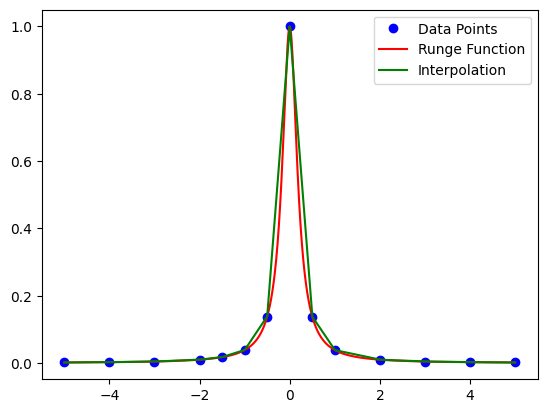

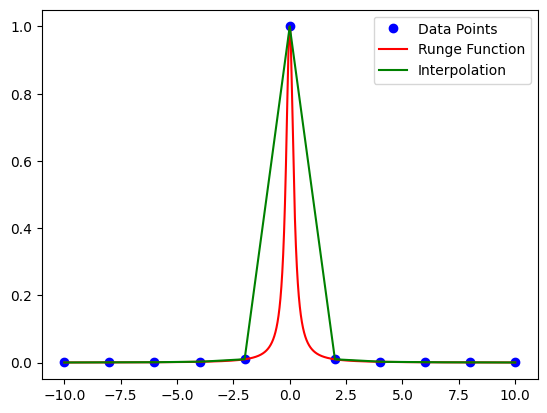

In [45]:
# Example entries
x1 = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
y1 = R(x1)

x2 = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
y2 = R(x2)

# Plotting
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'linear')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'linear')
grafico(x2, y2, xeval, yeval, y_resp)

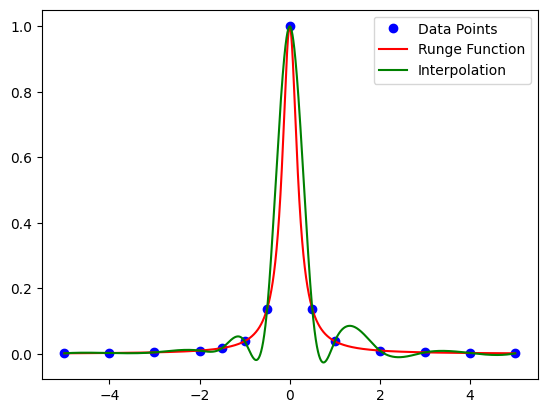

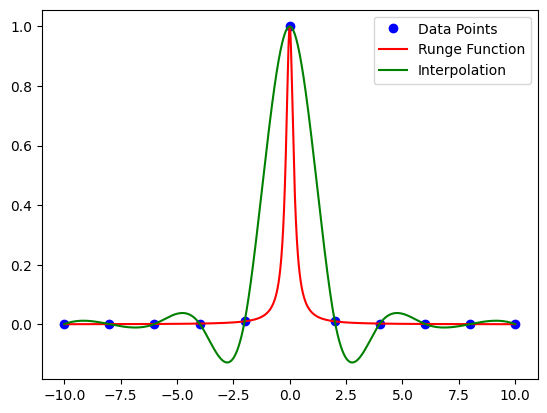

In [46]:
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'cubic')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'cubic')
grafico(x2, y2, xeval, yeval, y_resp)

### Exercicio 3


In [ ]:
documen = open("data.txt", "r")
data = documen.read().split("\n")
#data = documen.readlines()

c1 = []
c2 = []
c3 = []
c4 = []

for i in range(len(data)-1):

    dataSplit = data[i].split()
    
    c1.append(dataSplit[0])
    c2.append(dataSplit[1])
    c3.append(dataSplit[2])
    c4.append(dataSplit[3])

documen.close()